t
K
V
x1
w
x1_prev_step
x1_prev_step_diff
w_prev_step
w_prev_step_diff
true_x1
true_w
pred_x1
pred_w
lambda_x1
lambda_w
[[-0.05551577]
 [-0.1291639 ]
 [-0.02355686]
 ...
 [-0.13373387]
 [-0.0327137 ]
 [-0.03126882]]


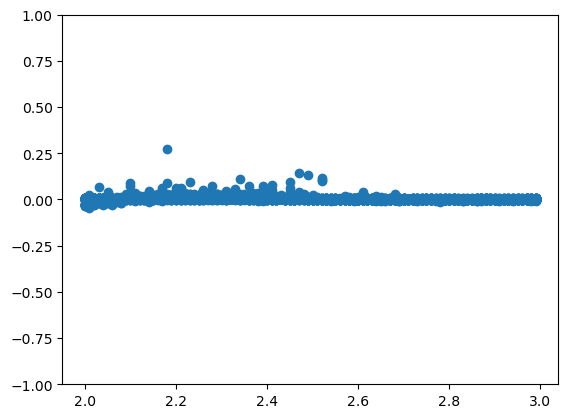

In [2]:

##mostra que ele cria uma cond inicial novamente para cada janela
import vtk
import matplotlib.pyplot as plt
import numpy as np

import vtk
from vtk.util.numpy_support import vtk_to_numpy
def read_vtp(path):
    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(path)
    reader.Update()
    data = reader.GetOutput().GetPointData()

    field_count = data.GetNumberOfArrays()
    return {data.GetArrayName(i): vtk_to_numpy(data.GetArray(i)) for i in range(field_count)}

def plot(path):

    data=read_vtp(path)
    #print(data)
    plt.scatter(data["t"],data["x1"])
    plt.ylim(-10,10)
   # print(data["x1"])


def plot2(path):
    
    data=np.load(path)
    for k in data.files:
         print(k)
    print(data["true_x1"])
    plt.scatter(data["t"],data["true_x1"]-data["pred_x1"])

    plt.ylim(-1,1)
   # print(data["x1"])


plt.show()
plt.clf()


 
plot2('outputs/fhn2eqtwboth/window2/constraints/data.npz')



1
2
3
4
5
6
7
8
9
max err 0.26425237951116287
mean err 0.0001333178138347762
AxesSubplot(0.125,0.653529;0.227941x0.226471)
(0.0, 9.9399995803833, 0.0, 0.9309999942779541)
0 0
1 0
2 0
(0.0, 9.9399995803833, 0.0, 0.9309999942779541)
0 3
1 3
2 3
(0.0, 9.9399995803833, 0.0, 0.9309999942779541)
0 6
1 6
2 6


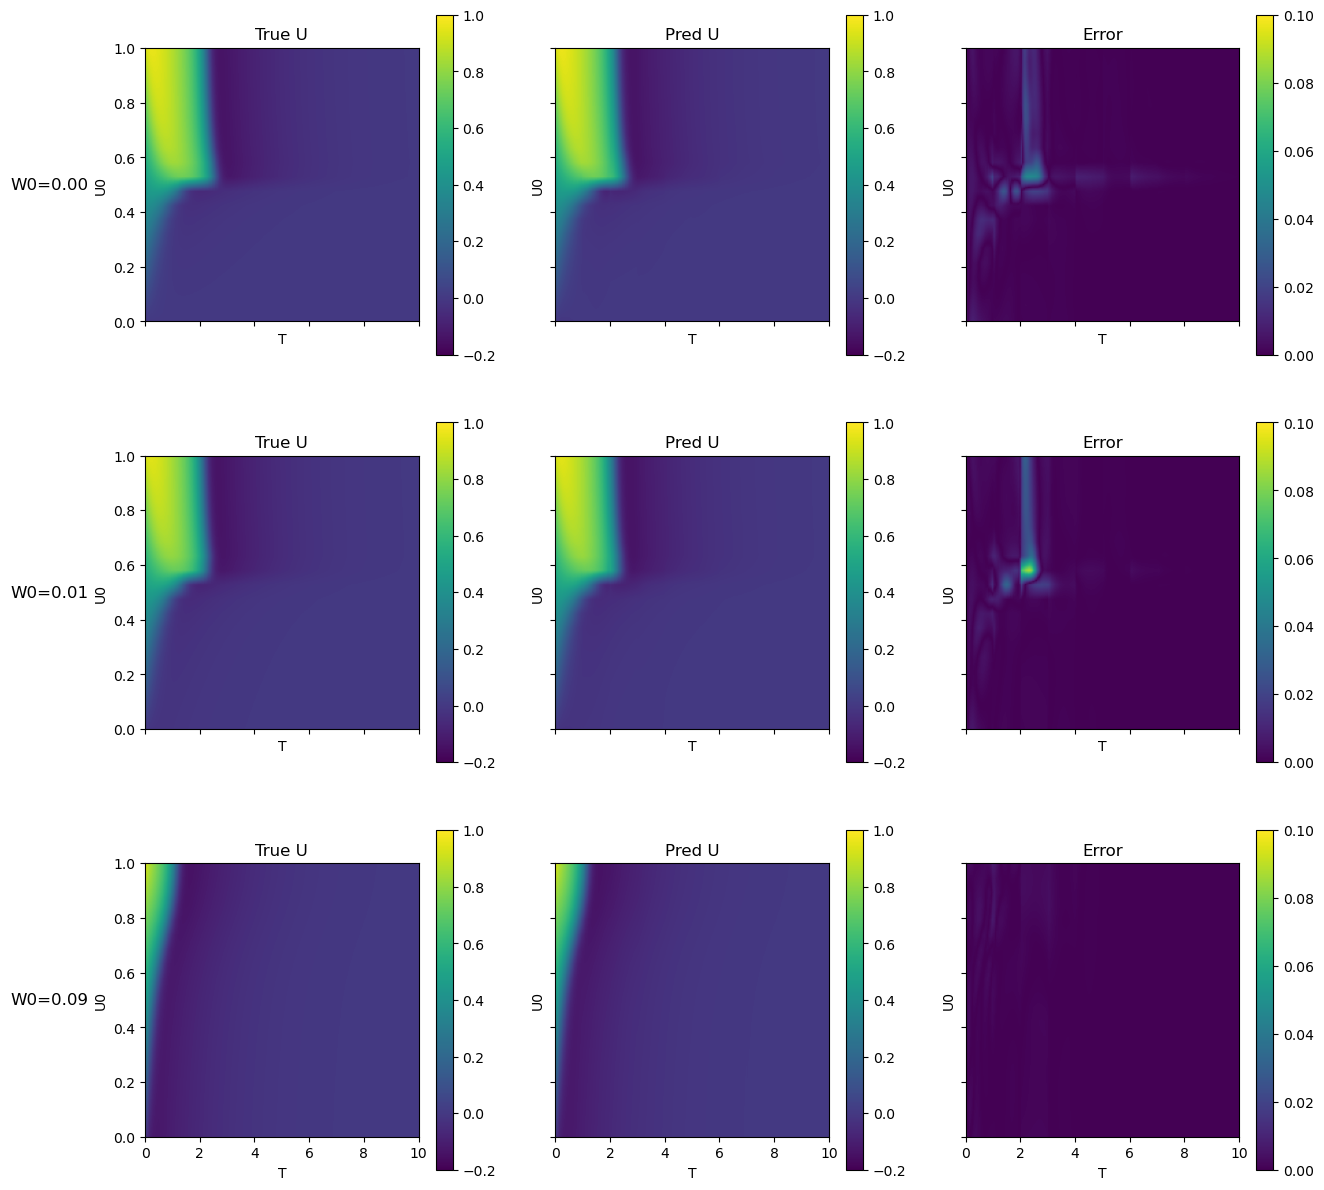

<Figure size 1500x400 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##mostra que ele cria uma cond inicial novamente para cada janela
import vtk
import matplotlib.pyplot as plt
import scipy  

import vtk
from vtk.util.numpy_support import vtk_to_numpy


def interpolate_2D( size, invar, *outvars):
        "Interpolate 2D outvar solutions onto a regular mesh"

        assert len(invar) == 2

        # define regular mesh to interpolate onto
        xs = [invar[k][:, 0] for k in invar]
        extent = (xs[0].min(), xs[0].max(), xs[1].min(), xs[1].max())
        xyi = np.meshgrid(
            np.linspace(extent[0], extent[1], size),
            np.linspace(extent[2], extent[3], size),
            indexing="ij",
        )

        # interpolate outvars onto mesh
        outvars_interp = []
        for outvar in outvars:
            outvar_interp = {}
            for k in outvar:
                outvar_interp[k] = scipy.interpolate.griddata(
                    (xs[0], xs[1]), outvar[k][:, 0], tuple(xyi)
                )
            outvars_interp.append(outvar_interp)

        return [extent] + outvars_interp

def all(invar, true_outvar, pred_outvar):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    img = ax.scatter(invar["K"], invar["V"],invar["t"],c=pred_outvar["x1"])
    
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

    fig.colorbar(img)
    plt.show()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    img = ax.scatter(invar["K"], invar["V"],invar["t"],c=true_outvar["x1"])
    
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

    fig.colorbar(img)
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    img = ax.scatter(invar["K"], invar["V"],invar["t"],c=((true_outvar["x1"] -pred_outvar["x1"])**2)**0.5 ) 
    
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

    fig.colorbar(img)
    plt.show()
    
fig,a=plt.subplots(3, 3,sharex=True,sharey=True,figsize=(3 * 5, 3*5), dpi=100)

def call(invar, true_outvar, pred_outvar,d=0,F=plt.figure(figsize=(3 * 5, 4), dpi=100),label=""):
        extent, true_outvar, pred_outvar = interpolate_2D(
                200, invar, true_outvar, pred_outvar
            )
        ndim=2
        print(extent)

        dims = list(invar.keys())
        fs = []
        for k in pred_outvar:

            for i, (o, tag) in enumerate(
                zip(
                    [true_outvar[k], pred_outvar[k], ((true_outvar[k] - pred_outvar[k])**2)**(0.5) ],
                    ["True U", "Pred U", "Error"],
                )
            ):
                if (tag=="diff"):
                    to=o
                    to[0][0]=0
                print(i,d)
                if ndim == 1:
                    f.plot(invar[dims[0]][:, 0], o[:, 0])
                    f.xlabel(dims[0])
                elif ndim == 2:
                    f=F[i]
                    im=f.imshow(o.T, origin="lower",extent=(0,10,0,1),aspect=10)
                    
                    f.set_xlabel("T")
                    f.set_ylabel("U0")
                    fig.colorbar(im,ax=f)
                    if(tag=="Error"):
                       
                        im.set_clim(0,0.1)
                    else :
                        im.set_clim(-.2,1)
               
                f.set_title(f"{tag}")
                
                ax=f
                if(i==0):
                    ax.annotate("W0="+label, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad,0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center')
            #f.tight_layout()

            
def plot2(xlist,ylist,Z):

    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X, Y, Z)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title('Filled Contours Plot')
    #ax.set_xlabel('x (cm)')
    ax.set_ylabel('y (cm)')
    plt.show()
    def read_vtp(path):
        reader = vtk.vtkXMLPolyDataReader()
        reader.SetFileName(path)
        reader.Update()
        data = reader.GetOutput().GetPointData()
        field_count = data.GetNumberOfArrays()
        return {data.GetArrayName(i): vtk_to_numpy(data.GetArray(i)) for i in range(field_count)}

def r(path):
    
    data=read_vtp(path)
    #print(data["t"])
    return data["t"],data["pred_x1"],data["K"],data["true_x1"],data["V"],data["pred_w"],data["true_w"]
def plot(path):

    data=read_vtp(path)
    
    ks=np.unique(data["K"])
    o=find(data["K"],ks[14])
    i=find(data["V"][o],0.0)
    for a in range(0,len(i)):
        i[a]=i[a]+o[0]
  #  print(i)
   
    #print(([i]))
    t=np.unique(data["t"])
    
    plt.plot(data['t'][i],data['true_x1'][i],"or")

    plt.plot(data['t'][i],data['pred_x1'][i],"b")

    plt.ylim(-1,1)

       
def find(list_to_check, item_to_find):
    return [idx for idx, value in enumerate(list_to_check) if value == item_to_find]



p=lambda s:'backup/outputs/fhn2eqtwboth/window'+str(s)+'/validators/validator.vtp'
#plot('outputs/fhn2eqtwboth/initial_conditions/validators/validator.vtp')


t,x,k,tx,v,w,tw= r('backup/outputs/fhn2eqtwboth/initial_conditions/validators/validator.vtp')
n_w=10

n=np.shape(x)[0]
T=np.zeros(n*n_w)
X=np.zeros(n*n_w)
K=np.zeros(n*n_w)
TX=np.zeros(n*n_w)
W=np.zeros(n*n_w)
TW=np.zeros(n*n_w)
V=np.zeros(n*n_w)

T[0:n]=t
X[0:n]=x
K[0:n]=k
TX[0:n]=tx
W[0:n]=w
TW[0:n]=tw
V[0:n]=v


for i in range(1,5):
    print(i)
    d=r(p(i))
   # plot(p(i))
    T[n*i:n*(i+1)]=d[0]
    X[n*i:n*(i+1)]=d[1]
    K[n*i:n*(i+1)]=d[2]
    TX[n*i:n*(i+1)]=d[3]
    V[n*i:n*(i+1)]=d[4]
    TW[n*i:n*(i+1)]=d[6]
    W[n*i:n*(i+1)]=d[5]



print("max err",(np.max( ((X-TX)**2)**0.5) ))
print("mean err",(np.mean(X-TX)**2)**0.5)

e=lambda x:np.expand_dims(x,axis=1)

print(a[0][0])
vs=np.unique(V)
vs=[vs[0],vs[2],vs[15]]
d=0
for v in (vs):
  
    i=find(V,v)
    invar={"t":e(T.T[i] )  ,"K":e(K.T)[i]  }

    out={"x1":e(X)[i],       }
    out_t={"x1":e(TX.T)[i],         }
    call(invar,out_t,out,F=a[d],d=3*d,label=str("{:.2f}".format(v)))
    d=d+1
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=.01)


#plt.show()
fig.savefig("c.png")


In [ ]:

def read_vtp(path):
    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(path)
    reader.Update()
    data = reader.GetOutput().GetPointData()
    field_count = data.GetNumberOfArrays()
    return {data.GetArrayName(i): vtk_to_numpy(data.GetArray(i)) for i in range(field_count)}

def r(path):
    
    data=read_vtp(path)
    #print(data["t"])
    return data["t"],data["pred_x1"],data["K"],data["true_x1"]
def plot(path):

    data=read_vtp(path)
    
    x=[]
    ts=np.unique(data["t"])
    for t in ts:
        i=find(data["t"],t)

        x.append(np.mean(((data["pred_x1"][i]-data["true_x1"][i])**2)**0.5))

    plt.plot(ts,x)
    plt.ylim(0,0.1)
def find(list_to_check, item_to_find):
    return [idx for idx, value in enumerate(list_to_check) if value == item_to_find]

p=lambda s:'outputs/fhn2eqtw/window'+str(s)+'/validators/validator.vtp'

for i in range(1,1):
    plot(p(i))


[0.         0.05       0.1        0.15000001 0.2        0.25
 0.30000001 0.34999999 0.40000001 0.44999999 0.5        0.55000001
 0.60000002 0.64999998 0.69999999 0.75       0.80000001 0.85000002
 0.89999998 0.94999999]
(50, 1)
(50, 1)
(50, 1)
(50, 1)
[0.         0.05       0.1        0.15000001 0.2        0.25
 0.30000001 0.34999999 0.40000001 0.44999999 0.5        0.55000001
 0.60000002 0.64999998 0.69999999 0.75       0.80000001 0.85000002
 0.89999998 0.94999999]
(50, 1)
(50, 1)
(50, 1)
(50, 1)


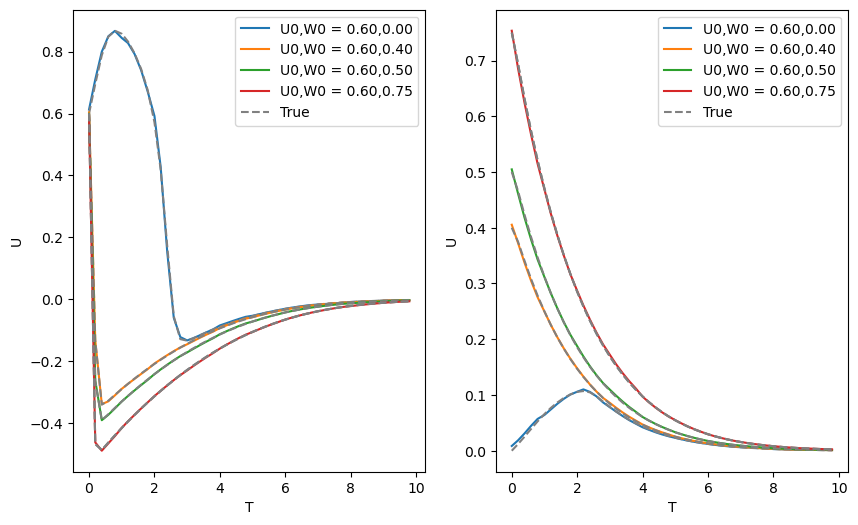

In [ ]:

fig,a=plt.subplots(1, 2,sharex=False,sharey=False,figsize=(10 , 6), dpi=100)
e=lambda x:np.expand_dims(x,axis=1)

u=np.unique(K)
v=np.unique(V)
print(v)
us=[(u[10],v[0]),(u[12],v[8]),(u[12],v[10]),(u[12],v[15])]
p=a[0]
d=0
for u,v in (us):
  
    i=find(K,u)
    #print(o)
    o=find(V,v)
    i=list(filter(lambda x:x in i, o))
    i=[a for a in i if a%1==0]
   
    invar={"t":e(T.T[i] )  ,"K":e(K.T)[i]  }

    out={"x1":e(X)[i],       }
    out_t={"x1":e(TX.T)[i],         }
    #print(np.shape(i))
    p.plot(invar["t"],out["x1"],label="U0,W0 = "+"{:.2f}".format(u)+ ",{:.2f}".format(v))
    p.set_xlabel("T")
    p.set_ylabel("U")
    print(np.shape(invar["t"]))
    p.plot(invar["t"],out_t["x1"],"--",color="grey")
    d=d+1
    
p.plot(invar["t"],out_t["x1"],"--",color="grey",label="True")
p.legend(loc='best')



u=np.unique(K)
v=np.unique(V)
print(v)
us=[(u[11],v[0]),(u[12],v[8]),(u[12],v[10]),(u[12],v[15])]
p=a[1]
d=0
for u,v in (us):
  
    i=find(K,u)
    #print(o)
    o=find(V,v)
    i=list(filter(lambda x:x in i, o))
    i=[a for a in i if a%1==0]
   
    invar={"t":e(T.T[i] )  ,"K":e(K.T)[i]  }

    out={"x1":e(W.T)[i],       }
    out_t={"x1":e(TW.T)[i],         }
    #print(np.shape(i))
    p.plot(invar["t"],out["x1"],label="U0,W0 = "+"{:.2f}".format(u)+ ",{:.2f}".format(v))
    p.set_xlabel("T")
    p.set_ylabel("U")
    print(np.shape(invar["t"]))
    p.plot(invar["t"],out_t["x1"],"--",color="grey")
    d=d+1
    
p.plot(invar["t"],out_t["x1"],"--",color="grey",label="True")
p.legend(loc='best')

plt.savefig("x2P.png")

(1600,)
(1600,)
(1600,)
(1600,)
(1600,)
(1600,)
(1600,)
(1600,)


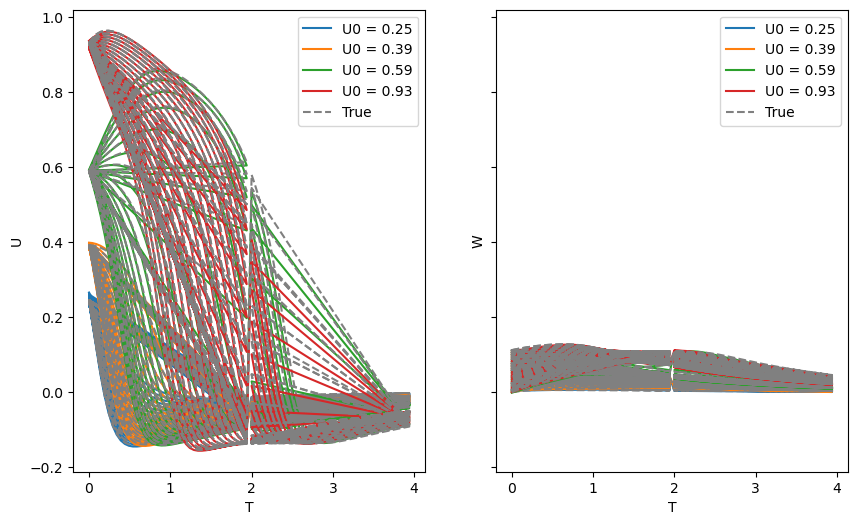

In [61]:
fig,a=plt.subplots(1, 2,sharex=False,sharey=True,figsize=(10 , 6), dpi=100)

e=lambda x:np.expand_dims(x,axis=1)

u=np.unique(K)
us=[u[5],u[8],u[12],u[19]]

d=0
for v in (us):
  
    i=find(K,v)
    i=[a for a in i if a%1==0]
   
    invar={"t":e(T.T[i] )  ,"K":e(K.T)[i]  }

    out={"x1":e(X)[i],       }
    out_t={"x1":e(TX.T)[i],         }
    print(np.shape(i))
    a[0].plot(invar["t"],out["x1"],label="U0 = "+"{:.2f}".format(v))
    a[0].set_xlabel("T")
    a[0].set_ylabel("U")
    
    a[0].plot(invar["t"],out_t["x1"],"--",color="grey")
    d=d+1
    
a[0].plot(invar["t"],out_t["x1"],"--",color="grey",label="True")
a[0].legend(loc='best')



u=np.unique(K)
us=[u[5],u[8],u[12],u[19]]

d=0
for v in (us):
  
    i=find(K,v)
    i=[a for a in i if a%1==0]
   
    invar={"t":e(T.T[i] )  ,"K":e(K.T)[i]  }

    out={"x1":e(W)[i],       }
    out_t={"x1":e(TW.T)[i],         }
    print(np.shape(i))
    a[1].plot(invar["t"],out["x1"],label="U0 = "+"{:.2f}".format(v))
    a[1].set_xlabel("T")
    a[1].set_ylabel("W")
    
    a[1].plot(invar["t"],out_t["x1"],"--",color="grey")
    d=d+1
    
a[1].plot(invar["t"],out_t["x1"],"--",color="grey",label="True")
a[1].legend(loc='best')





plt.savefig("x1P.png")